In [ ]:
"""
If running in an external environment, please use files provided along with this notebook to read variables in the cell below : https://colab.research.google.com/drive/1Tn1N-n_FN3EJkQDRVnYu5iwcUZG4LuPe?authuser=1#scrollTo=Lnz4P0rny80J&line=10&uniqifier=1
"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import random
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

"""
for preprocessing the data
"""
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

"""
for evaluating accuracy of model based on confusion matrix
"""
from sklearn import metrics


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
fp1 = open("/content/drive/My Drive/Colab Notebooks/sentiment analysis/Dictionary.txt", "r")
lines1 = fp1.readlines()
fp1.close()

fp2 = open("/content/drive/My Drive/Colab Notebooks/sentiment analysis/Senti_scores.txt", "r")
lines2 = fp2.readlines()
fp2.close()

fp3 = open("/content/drive/My Drive/Colab Notebooks/sentiment analysis/Train-Dev_test split.txt", "r")
lines3 = fp3.readlines()
fp3.close()

fp4 = open("/content/drive/My Drive/Colab Notebooks/sentiment analysis/Movie Review Dataset.txt", "r")
lines4 = fp4.readlines()
fp4.close()

In [ ]:
"""
converting scores to classes
"""
phrase_index = {}
index_score = {}
data_split = {}
sent_index = {}
index_class = {}

for line in lines1:
  tokens = line.strip().split("|")
  phrase_index[tokens[0]]=tokens[1]
for line in lines2[1:]:
  tokens = line.strip().split("|")
  index_score[tokens[0]]=float(tokens[1])
for line in lines3[1:]:
  tokens = line.strip().split(",")
  data_split[tokens[0]]=tokens[1]
for line in lines4[1:]:
  tokens = line.strip().split("\t")
  sent_index[tokens[0]]=tokens[1]

for i, s in index_score.items():
  if s<=0.2:
    index_class[i]=0
  elif s<=0.4:
    index_class[i]=1
  elif s<=0.6:
    index_class[i]=2
  elif s<=0.8:
    index_class[i]=3
  elif s<=1.0:
    index_class[i]=4

In [ ]:
"""
cleaning the phrases
"""
phrases=list(phrase_index.keys())
Y=list(phrase_index.values())

Stopwords = set(stopwords.words("english"))

for i in range(len(phrases)):
  phrase = re.sub("[^A-Za-z]+", " ", phrases[i])
  words = word_tokenize(phrase)
  words = [word.lower() for word in words]
  words = [word for word in words if word not in Stopwords]
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words]
  clean_phrase = " ".join(words)
  phrases[i] = clean_phrase

In [ ]:
i=10
j=5
for k,v in phrase_index.items():
  if i>0 and i<5:
    print(k)
  i=i-1
print("---------------------------------------------------------------")
for i in range(6,10):
  print(phrases[i])

! Brilliant ! '
! C'mon
! Gollum 's ` performance ' is incredible
! Oh , look at that clever angle ! Wow , a jump cut !
---------------------------------------------------------------
brilliant
c mon
gollum performance incredible
oh look clever angle wow jump cut


In [ ]:
Y_class=[0 for i in range(len(Y))]
for i in range(len(Y)):
  Y[i]=index_class[Y[i]]

In [ ]:
sum=0
for phrase in phrases:
  sum+= len(phrase.split())
avg=sum/len(phrases)

avg

4.239060827982879

In [ ]:
embed_dim = 50
max_seq_len = 8

min_val=0.001

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(phrases)
sequence = tokenizer.texts_to_sequences(phrases)

In [ ]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

16034


In [ ]:
padded_seq = pad_sequences(sequence , maxlen = max_seq_len )

In [ ]:
padded_seq, padded_seq.shape

(array([[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,  3847],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,  2206, 13469, 13470]], dtype=int32),
 (239232, 8))

In [ ]:
arr={0:0, 1:0, 2:0, 3:0, 4:0}
for i in range(len(Y)):
  arr[Y[i]]+=1
arr

{0: 11352, 1: 43028, 2: 119449, 3: 50148, 4: 15255}

In [ ]:
"""
splitting the data into train, dev and test set in the ration 44:28:28
"""
z = list(zip(padded_seq, Y))
random.Random(8).shuffle(z)
padded_seq, Y = zip(*z)

x_train = []
x_dev = []
x_test = []

y_train = []
y_dev = []
y_test = []

c0={'train':0,'dev':0,'test':0}
c1={'train':0,'dev':0,'test':0}
c2={'train':0,'dev':0,'test':0}
c3={'train':0,'dev':0,'test':0}
c4={'train':0,'dev':0,'test':0}

for i in range(len(Y)):

  if Y[i]==0:
    if c0['train']<int(arr[0]/5):
      x_train.append(i)
      c0['train']+=1
    elif c0['dev']<int(arr[0]/5):
      x_dev.append(i)
      c0['dev']+=1
    elif c0['test']<int(arr[0]/5):
      x_test.append(i)
      c0['test']+=1

  elif Y[i]==1:
    if c1['train']<int(arr[1]/16):
      x_train.append(i)
      c1['train']+=1
    elif c1['dev']<int(arr[1]/16):
      x_dev.append(i)
      c1['dev']+=1
    elif c1['test']<int(arr[1]/16):
      x_test.append(i)
      c1['test']+=1
    
  elif Y[i]==2:
    if c2['train']<int(40000/16):
      x_train.append(i)
      c2['train']+=1
    elif c2['dev']<int(40000/16):
      x_dev.append(i)
      c2['dev']+=1
    elif c2['test']<int(40000/16):
      x_test.append(i)
      c2['test']+=1

  elif Y[i]==3:
    if c3['train']<int(arr[3]/16):
      x_train.append(i)
      c3['train']+=1
    elif c3['dev']<int(arr[3]/16):
      x_dev.append(i)
      c3['dev']+=1
    elif c3['test']<int(arr[3]/16):
      x_test.append(i)
      c3['test']+=1

  if Y[i]==4:
    if c4['train']<int(arr[4]/7):
      x_train.append(i)
      c4['train']+=1
    elif c4['dev']<int(arr[4]/7):
      x_dev.append(i)
      c4['dev']+=1
    elif c4['test']<int(arr[4]/7):
      x_test.append(i)
      c4['test']+=1


In [ ]:
len(x_train), len(x_dev), len(x_test)

(12772, 12772, 12772)

In [ ]:
X_train=[]
Y_train=[]
X_dev=[]
Y_dev=[]
X_test=[]
Y_test=[]

for i in x_train:
  X_train.append(padded_seq[i])
  Y_train.append(Y[i])
for i in x_dev:
  X_dev.append(padded_seq[i])
  Y_dev.append(Y[i])
for i in x_test:
  X_test.append(padded_seq[i])
  Y_test.append(Y[i])

In [ ]:
len(X_train), len(Y_train), len(X_dev), len(Y_dev), len(X_test), len(Y_test)

(12772, 12772, 12772, 12772, 12772, 12772)

In [ ]:
brr={0:0, 1:0, 2:0, 3:0, 4:0}
for i in range(len(Y_train)):
  brr[Y_train[i]]+=1
brr

{0: 2270, 1: 2689, 2: 2500, 3: 3134, 4: 2179}

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0005/word_index', 'rb') as handle:
  my_word_index=pickle.load(handle)
with open('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0005/index_word', 'rb') as handle1:
  my_index_word=pickle.load(handle1)
with open('/content/drive/My Drive/Colab Notebooks/negatuve/lr=0.0005/wh_epoch_200', 'rb') as handle2:
  my_vectors=pickle.load(handle2)

In [ ]:
"""
initializing the embedding matrix
"""

embedding_matrix = np.zeros((len(index_of_words) + 1, embed_dim))

for w,i in index_of_words.items():
  if w in my_word_index1.keys():
    temp = my_vectors1[my_word_index1.get(w)]
    embedding_matrix[i] = temp

In [ ]:
embedding_matrix.shape

(16035, 50)

In [ ]:
len(index_of_words)

16034

In [ ]:
"""
statically storing the "embedding layer" output of X_train and X_dev and then flattening it for input to hidden layer
"""
flattened_X_train =[]
flattened_X_dev =[]
flattened_X_test =[]

for x in X_train:
  emb_op=np.zeros((max_seq_len, embed_dim))
  for i in range(len(x)):
    emb_op[i]=embedding_matrix[x[i]]
  emb_op=emb_op.flatten()
  flattened_X_train.append(emb_op)

for y in X_dev:
  emb_op=np.zeros((max_seq_len, embed_dim))
  for i in range(len(y)):
    emb_op[i]=embedding_matrix[y[i]]
  emb_op=emb_op.flatten()
  flattened_X_dev.append(emb_op)

for z in X_test:
  emb_op=np.zeros((max_seq_len, embed_dim))
  for i in range(len(z)):
    emb_op[i]=embedding_matrix[z[i]]
  emb_op=emb_op.flatten()
  flattened_X_test.append(emb_op)

flattened_X_train=np.array(flattened_X_train)
flattened_X_dev=np.array(flattened_X_dev)
flattened_X_test=np.array(flattened_X_test)

In [ ]:
flattened_X_train.shape, flattened_X_dev.shape, flattened_X_test.shape

((12772, 400), (12772, 400), (12772, 400))

In [ ]:
"""
initializing hidden layer and dense layer parameters
"""
np.random.seed(8)
W_h = np.random.randn(max_seq_len*embed_dim, 500)*0.1
b_h = np.random.randn(500)*0.01

W_o = np.random.randn(500, 5)*0.1
b_o = np.random.randn(5)*0.01

print("W_h, b_h and W_o, b_o have shapes {0} {1} {2} {3}".format(W_h.shape,b_h.shape, W_o.shape, b_o.shape))

W_h, b_h and W_o, b_o have shapes (400, 500) (500,) (500, 5) (5,)


In [ ]:
#reshuffling examples once again
z1 = list(zip(flattened_X_train, Y_train))
random.shuffle(z1)
flattened_X_train, Y_train = zip(*z1)

z2 = list(zip(flattened_X_dev, Y_dev))
random.shuffle(z2)
flattened_X_dev, Y_dev = zip(*z2)

z3 = list(zip(flattened_X_test, Y_test))
random.shuffle(z3)
flattened_X_test, Y_test = zip(*z3)

In [ ]:
Y_dev[12760:12772]

In [ ]:
def one_hot_vector(n):
  # returns one-hot representation of a word from its index
  vec = np.zeros(5)
  vec[n] = 1
  return vec

In [ ]:
def softmax(vector):
    # applies softmax to a vector
    if vector.ndim >1:
      vector -= np.max(vector, axis=1).reshape(-1, 1)
      vector = np.divide(np.exp(vector), np.sum(np.exp(vector), axis=1).reshape(-1, 1) + minval)
    else:
      vector -= np.max(vector)
      vector = np.divide(np.exp(vector), np.sum(np.exp(vector)) + min_val)

    return vector

In [ ]:
def logistic(z):
  return 1./(1. + np.exp(-z))

In [ ]:
def cross_entropy(y_hat, y):
  # computes cross entropy error given the prediction and true label
  
  loss = -y*np.log(y_hat + min_val)
  return loss

In [ ]:
def SGD(num_epochs, lr, reg_lambda, X_train, X_dev, Y_train, Y_dev):
  global W_h,b_h,W_o,b_o
  train_costs=[]
  dev_costs=[]
  begin_time = datetime.now()
  for epoch in range(1, num_epochs+1):

    train_cost=0
    dev_cost=0
    for i in range(len(X_train)):
      
      #forward propagation
      X=X_train[i]
      T=one_hot_vector(Y_train[i])

      h=np.dot(X, W_h)+b_h
      H=logistic(h)
      y=np.dot(H, W_o)+b_o
      Y=softmax(y)

      #loss calculation
      loss=cross_entropy(Y, T)
      loss=np.sum(loss)
      #+(np.sum(np.square(W_h))+np.sum(np.square(W_o)))*(reg_lambda/2) 
      train_cost+=loss

      #backward propagation
      error_o = Y-T
      dW_o = np.outer(H.T, error_o) + reg_lambda*W_o
      db_o = error_o
      
      error_h = np.multiply(np.multiply(H,(1 - H)), np.dot(error_o, W_o.T)) 
      dW_h = np.outer(X.T, error_h) + reg_lambda*W_h
      db_h = error_h

      #updating parameters
      W_o = W_o - lr*dW_o
      b_o = b_o - lr*db_o

      W_h = W_h - lr*dW_h
      b_h = b_h - lr*db_h

    for i in range(len(X_dev)):
      #validation set loss calculation
      X=X_dev[i]
      T=one_hot_vector(Y_dev[i])

      h=np.dot(X, W_h)+b_h
      H=logistic(h)
      y=np.dot(H, W_o)+b_o
      Y=softmax(y)

      loss=cross_entropy(Y, T)
      loss=np.sum(loss)+(np.sum(np.square(W_h))+np.sum(np.square(W_o)))*(reg_lambda/2)
      dev_cost+=loss

    train_costs.append(train_cost)
    dev_costs.append(dev_cost)
    
    if epoch%10==0:
      with open('/content/drive/My Drive/Colab Notebooks/sentiment analysis/shallow network 0/wh_epoch_reg_0.0_my_50 '+str(epoch), 'wb') as handle:
        pickle.dump(W_h, handle, protocol=pickle.HIGHEST_PROTOCOL)
      with open('/content/drive/My Drive/Colab Notebooks/sentiment analysis/shallow network 0/wo_epoch_reg_0.0_my_50 '+str(epoch), 'wb') as handle1:
        pickle.dump(W_o, handle1, protocol=pickle.HIGHEST_PROTOCOL)
      with open('/content/drive/My Drive/Colab Notebooks/sentiment analysis/shallow network 0/bh_epoch_reg_0.0_my_50 '+str(epoch), 'wb') as handle2:
        pickle.dump(b_h, handle2, protocol=pickle.HIGHEST_PROTOCOL)
      with open('/content/drive/My Drive/Colab Notebooks/sentiment analysis/shallow network 0/bo_epoch_reg_0.0_my_50 '+str(epoch), 'wb') as handle3:
        pickle.dump(b_o, handle3, protocol=pickle.HIGHEST_PROTOCOL)
      print("Epoch {0} --> Training Cost = {1}".format(epoch, train_cost))

  end_time = datetime.now()
  print('Total training time: {}'.format(end_time - begin_time))

  with open('/content/drive/My Drive/Colab Notebooks/sentiment analysis/shallow network 0/train_costs_reg_0.0_my_50 ', 'wb') as handle4:
    pickle.dump(train_costs, handle4, protocol=pickle.HIGHEST_PROTOCOL)
  with open('/content/drive/My Drive/Colab Notebooks/sentiment analysis/shallow network 0/dev_costs_reg_0.0_my_50 ', 'wb') as handle5:
    pickle.dump(dev_costs, handle5, protocol=pickle.HIGHEST_PROTOCOL)

  # Plotting each epoch's cost
  plt.plot(np.arange(num_epochs), train_costs, label="training loss")
  plt.plot(np.arange(num_epochs), dev_costs, label="validation loss")
  plt.xlabel('# of epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.savefig('/content/drive/My Drive/Colab Notebooks/sentiment analysis/shallow network 0/plot_reg_0.0_my_50.png', bbox_inches='tight')

Epoch 10 --> Training Cost = 22237.00948779737
Epoch 20 --> Training Cost = 21455.606614501303
Epoch 30 --> Training Cost = 21101.35317366834
Epoch 40 --> Training Cost = 20910.486780960357
Total training time: 0:22:28.736802


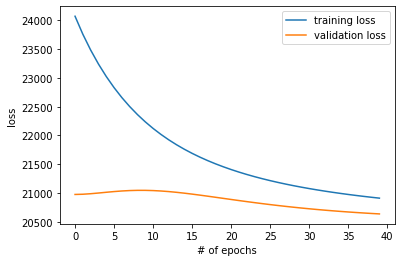

In [ ]:
SGD(40, 0.01, 0, flattened_X_train, flattened_X_dev, Y_train, Y_dev)

In [ ]:
"""
obtaining predictions for train,dev and test set
"""
pred_train=[]
pred_dev=[]
pred_test=[]

for i in range(len(flattened_X_train)):
  X=flattened_X_train[i]
  h=np.dot(X, W_h)+b_h
  H=logistic(h)
  y=np.dot(H, W_o)+b_o
  Y=softmax(y)

  n=np.argmax(Y)
  pred_train.append(n)


for i in range(len(flattened_X_dev)):
  X=flattened_X_dev[i]
  h=np.dot(X, W_h)+b_h
  H=logistic(h)
  y=np.dot(H, W_o)+b_o
  Y=softmax(y)

  n=np.argmax(Y)
  pred_dev.append(n)

for i in range(len(flattened_X_test)):
  X=flattened_X_test[i]
  h=np.dot(X, W_h)+b_h
  H=logistic(h)
  y=np.dot(H, W_o)+b_o
  Y=softmax(y)

  n=np.argmax(Y)
  pred_test.append(n)

In [ ]:
cm1 = metrics.confusion_matrix(Y_train, pred_train)
cm2 = metrics.confusion_matrix(Y_dev, pred_dev)
cm3 = metrics.confusion_matrix(Y_test, pred_test)
cm1, cm2, cm3

(array([[   0,    1,   58,   69, 2142],
        [   0,    4,   60,   83, 2542],
        [   0,    2,   85,   55, 2358],
        [   0,    3,   73,   92, 2966],
        [   0,    2,   46,   55, 2076]]),
 array([[   0,    0,   64,   59, 2147],
        [   0,    5,   68,   77, 2539],
        [   0,    0,   63,   53, 2384],
        [   0,    1,   71,   94, 2968],
        [   0,    2,   56,   57, 2064]]),
 array([[   0,    1,   51,   72, 2146],
        [   0,    2,   63,   77, 2547],
        [   0,    4,   60,   54, 2382],
        [   0,    3,   73,   77, 2981],
        [   0,    2,   44,   53, 2080]]))

In [ ]:
print("Training Accuracy = ",metrics.accuracy_score(Y_train, pred_train)*100)
print("Devset Accuracy = ",metrics.accuracy_score(Y_dev, pred_dev)*100)
print("Testing Accuracy = ",metrics.accuracy_score(Y_test, pred_test)*100)

Training Accuracy =  17.671468838083307
Devset Accuracy =  17.428750391481366
Testing Accuracy =  17.373943000313187
